In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [93]:
df_train = pd.read_csv('../data/churn-bigml-80.csv')
df_test = pd.read_csv('../data/churn-bigml-20.csv')
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Overview

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [81]:
print('Duplicate values in train' ,df_train.duplicated().sum())
print('Duplicate values in test' ,df_test.duplicated().sum())

Duplicate values in train 0
Duplicate values in test 0


In [82]:
print('Missing values in train' ,df_train.isna().sum().sum())
print('Missing values in test' ,df_test.isna().sum().sum())

Missing values in train 0
Missing values in test 0


In [83]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df = df_train.select_dtypes(include=numerics)
numerical_df.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

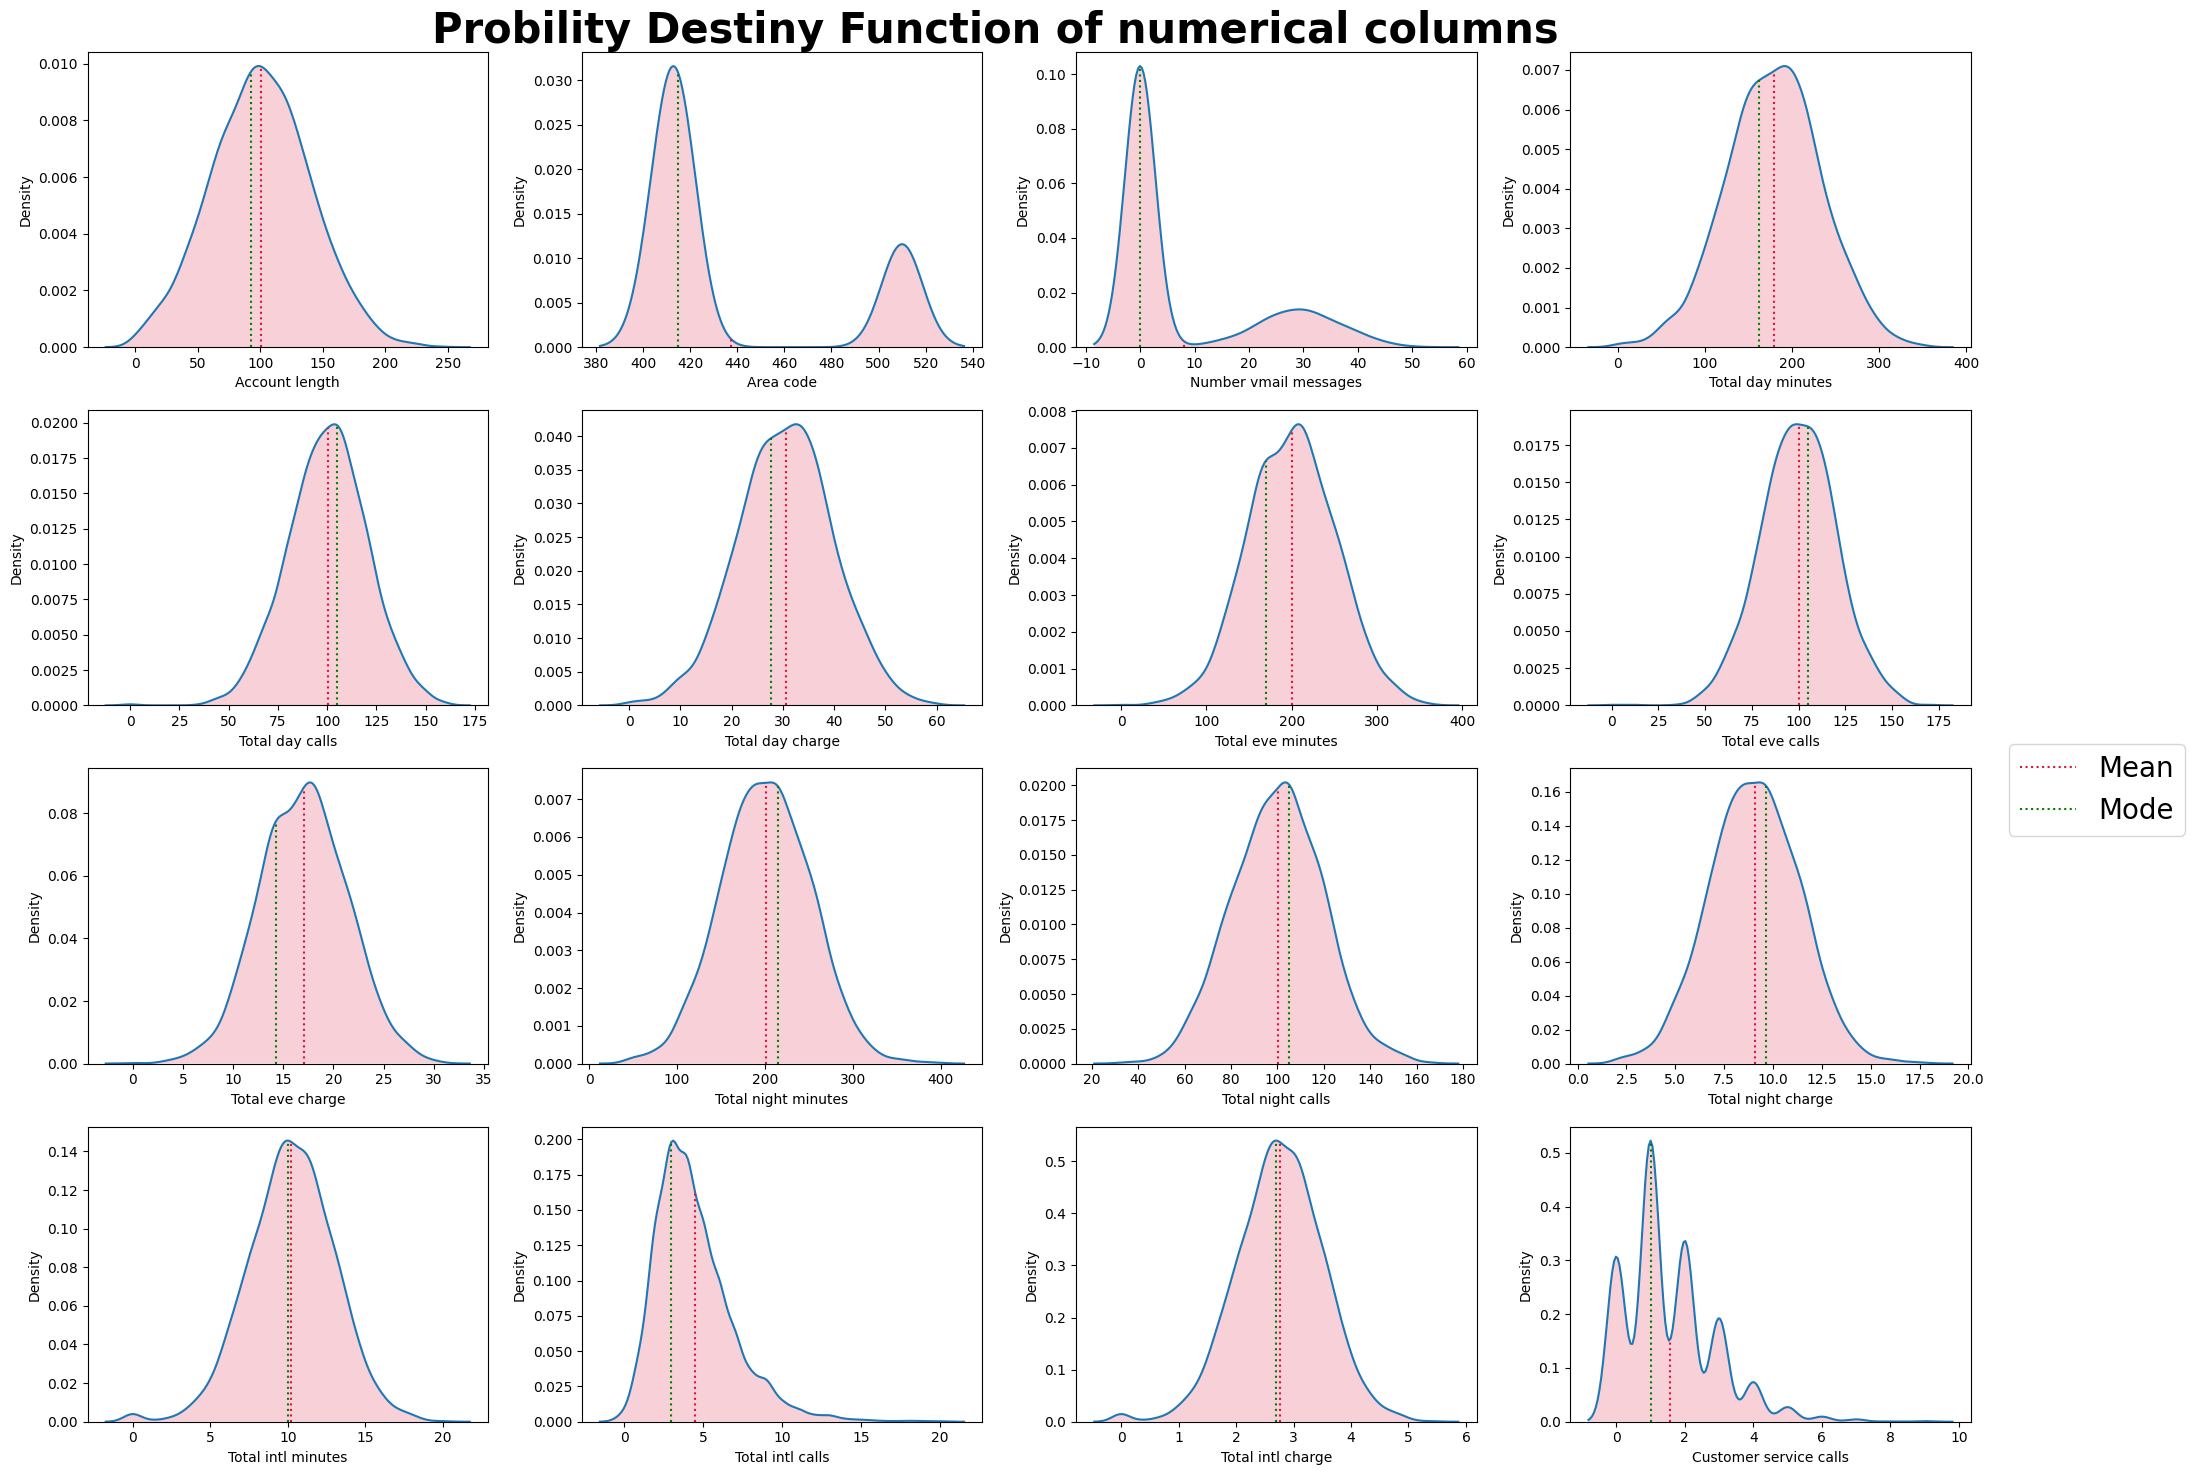

In [84]:
fig, ax = plt.subplots(math.ceil(numerical_df.shape[1]/4), 4,  figsize = (20, 15))
for i, col in enumerate(numerical_df.columns):
    
    row = math.floor(i/4)
    _col = i%4
    
    sns.kdeplot(data = numerical_df, x = col, ax = ax[row][_col])

    # mean and mode
    kdeline = ax[row][_col].lines[0]
    mean = numerical_df[col].mean()
    mode = numerical_df[col].mode()[0]

    # plot mean and mode
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    height = np.interp(mean, xs, ys)
    height_mode = np.interp(mode, xs, ys)
    mean_vline = ax[row][_col].vlines(mean, 0, height, color='crimson', ls=':', label = "Mean")
    mode_vline = ax[row][_col].vlines(mode, 0, height_mode, color='g', ls=':', label = "Mode")
    ax[row][_col].fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)

fig.suptitle("Probility Destiny Function of numerical columns", fontsize = 30, fontweight = "bold")
fig.tight_layout()
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.5), prop={"size": 20})
plt.show()

Almost kernel density estimate (KDE) plots have normal distribution. This means that the data tends to have fewer outlier values.

In [ ]:
def clean(df):
    # Remove non-necessary columns
    df.drop(['State', 'Account length', 'Area code'], axis=1, inplace= True)
    
    #Change variable name separators to '_'
    all_columns = [column.replace(" ", "_") for column in df.columns]

    #Effect the change to the dataframe column names
    df.columns = all_columns

    # Clear text and encoding
    df['Voice_mail_plan'] = df['Voice_mail_plan'].map(lambda x: x.strip())
    df['International_plan'] = df['International_plan'].map(lambda x: x.strip())

For futher explore and building model:
- Remove `State`, `Account length`, `Area code` which are not important in this model.
- Change variable name separators to '_' for training model.

In [91]:
def clean(df):
    # Remove non-necessary columns
    df.drop(['State', 'Account length', 'Area code'], axis=1, inplace= True)
    
    # Change variable name separators to '_'
    all_columns = [column.replace(" ", "_") for column in df.columns]

    #Effect the change to the dataframe column names
    df.columns = all_columns

    # Clear text and encoding
    df['Voice_mail_plan'] = df['Voice_mail_plan'].map(lambda x: x.strip())
    df['International_plan'] = df['International_plan'].map(lambda x: x.strip())

In [94]:
clean(df_train)
clean(df_test)
df_train.head()

,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Explore dataset.

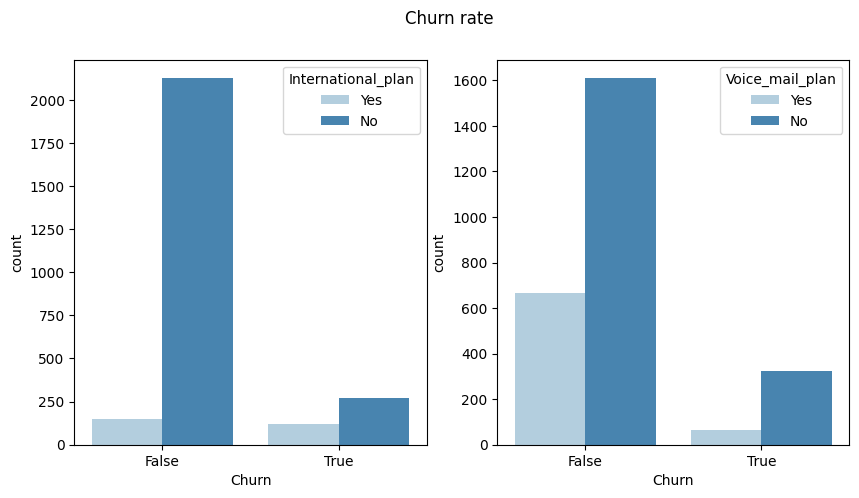

In [95]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("Churn rate")
sns.countplot(df_train, x = 'Churn', hue= 'International_plan', ax = ax[0], palette = "Blues", hue_order= ['Yes', 'No'])
sns.countplot(df_train, x = 'Churn', hue= 'Voice_mail_plan', ax = ax[1], palette = "Blues", hue_order= ['Yes', 'No'])
plt.show()

- Over 2000 customers don't have `International plan` but the "False" churn rate of the customers who don't have is very high somehow show that feature is not too important in deciding whether to churn or not.
- However, `Voice mail plan` gets more customers attention, customers who have `voice mail plan` likely less churn the service.


Because the data we have is in string format, it cannot be used directly for further calculations. To address this, we converted the string data to numerical representation. We changed ***"Yes, True"*** entries to `1` and ***"No, Fales"*** values to `0` to facilitate numerical processing.

In [98]:
def encoding(df):
    df = df.replace(['Yes', True], 1)
    df = df.replace(['No', False], 0)
    return df

In [99]:
df_train = encoding(df_train)
df_test = encoding(df_test)
df_train.head()

,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   International_plan      2666 non-null   int64  
 1   Voice_mail_plan         2666 non-null   int64  
 2   Number_vmail_messages   2666 non-null   int64  
 3   Total_day_minutes       2666 non-null   float64
 4   Total_day_calls         2666 non-null   int64  
 5   Total_day_charge        2666 non-null   float64
 6   Total_eve_minutes       2666 non-null   float64
 7   Total_eve_calls         2666 non-null   int64  
 8   Total_eve_charge        2666 non-null   float64
 9   Total_night_minutes     2666 non-null   float64
 10  Total_night_calls       2666 non-null   int64  
 11  Total_night_charge      2666 non-null   float64
 12  Total_intl_minutes      2666 non-null   float64
 13  Total_intl_calls        2666 non-null   int64  
 14  Total_intl_charge       2666 non-null   

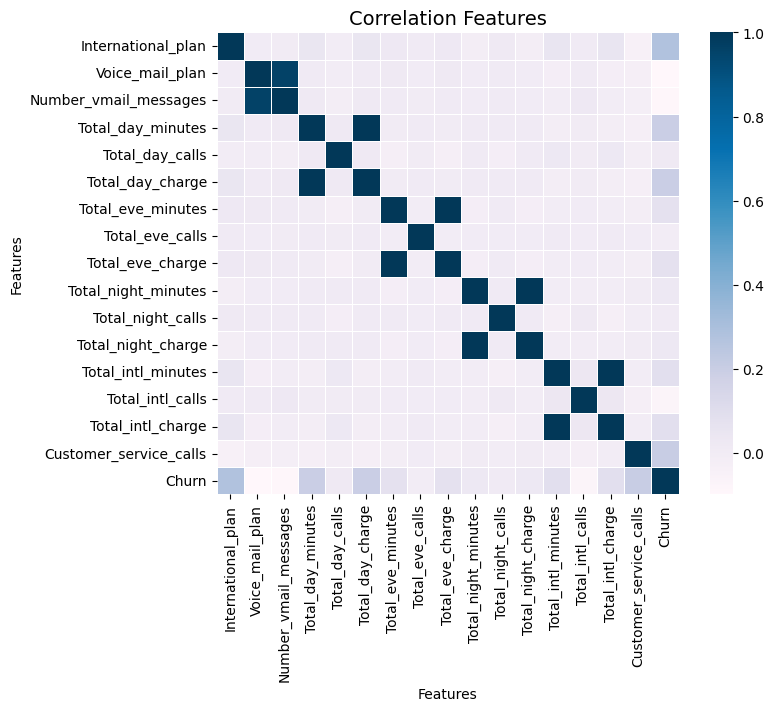

In [100]:
# calculate correlation and filter for high correlation
corr = df_train.corr()

# create heatmap with improved style
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, cmap='PuBu', linewidths=.5, cbar=True, square=True, ax=ax)
ax.set_title('Correlation Features', fontsize=14)
ax.set_xlabel('Features')
ax.set_ylabel('Features')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

Characteristics such as execution form and execution time are identical for features with a correlation of 1. For example: `voice mail plan` has correlation with `Number vmail message`, `total day minutes` has correlation with `total day charge`, etc.

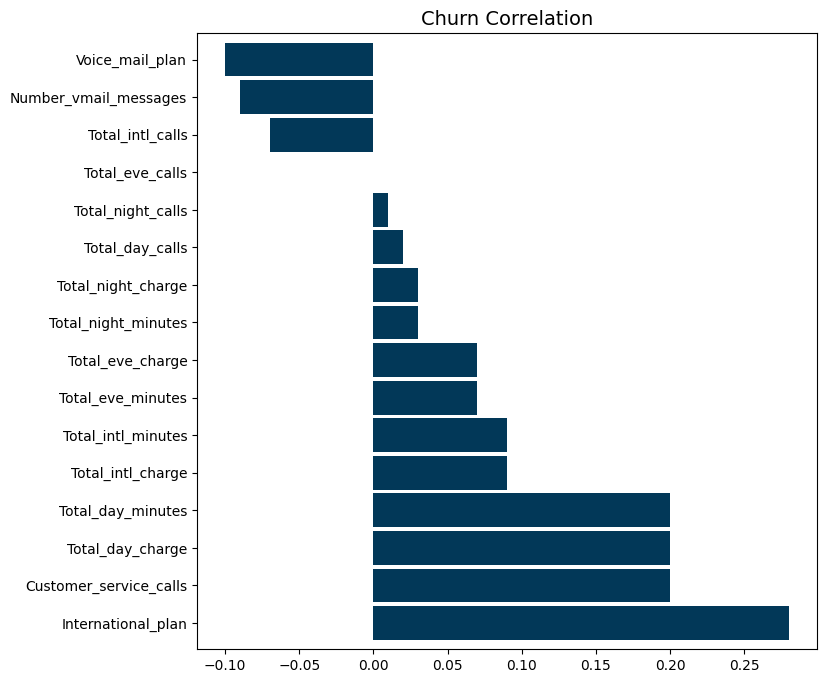

In [63]:
ax = round(corr['Churn'].sort_values(ascending = False)[1:], 2).plot(kind = 'barh', colormap= 'PuBu_r', width = 0.9, figsize = (8,8))
ax.set_title('Churn Correlation', fontsize=14)
plt.show() 

- `International plan` has co-variable correlation with `Churn` and `voice mail plan` has inverse correlation with `Churn` but it is small and unimportant.

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Prepare it for the GLM formula
glm_columns = [e for e in df_train.columns if e not in ['Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data = df_train, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                            GLM   Df Residuals:                     2649
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.96
Date:                Mon, 10 Jun 2024   Deviance:                       1729.9
Time:                        02:25:36   Pearson chi2:                 2.77e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1655
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7

In [65]:
np.exp(res.params)

Intercept                 3.633660e-04
International_plan        8.203631e+00
Voice_mail_plan           1.259998e-01
Number_vmail_messages     1.039535e+00
Total_day_minutes         6.251371e-01
Total_day_calls           1.002918e+00
Total_day_charge          1.707275e+01
Total_eve_minutes         4.681157e+00
Total_eve_calls           9.992740e-01
Total_eve_charge          1.388240e-08
Total_night_minutes       9.902150e-01
Total_night_calls         1.001952e+00
Total_night_charge        1.323878e+00
Total_intl_minutes        2.720746e-02
Total_intl_calls          8.868244e-01
Total_intl_charge         9.094709e+05
Customer_service_calls    1.661227e+00
dtype: float64

In [66]:
# Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

The range of numeric features should be normalized so that each feature contributes approximately proportionately to the final distance, so we do feature scaling.

In [67]:
class Classifier:
    def __init__(self, train, test):
        self.train = train
        self.test = test
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = None
        self.model = None

    def train_test(self):
        self.X_train = self.train.drop(["Churn"], axis=1)
        self.X_test = self.test.drop(["Churn"], axis=1)
        self.y_train = self.train['Churn']
        self.y_test = self.test['Churn']

        # Standardize the features
        self.scaler = MinMaxScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)

    def modeling(self, alg, alg_name, params={}):
        self.model = alg(**params)
        self.model.fit(self.X_train, self.y_train)
        y_pred = self.model.predict(self.X_test)

        def print_scores(alg, y_true, y_pred):
            print(alg_name)
            print("Confusion Matrix: \n", confusion_matrix(y_true, y_pred))
            print("Classification Report: \n", classification_report(y_true, y_pred))
            print("Accuracy: ", accuracy_score(y_true, y_pred))
            print("Precision: ", precision_score(y_true, y_pred))
            print("Recall: ", recall_score(y_true, y_pred))
            print("F1_score: ",f1_score(y_true, y_pred, average='weighted'))

        print_scores(alg, self.y_test, y_pred)
    
    def hyper_tuning(self, alg, alg_name, search_method, param_grid = {}):
        search = search_method(alg(), param_grid)
        search.fit(self.X_train, self.y_train)
        best_params = search.best_params_
        print(search.best_estimator_)
        
        self.modeling(alg, alg_name, params = best_params)

In [68]:
log_model = Classifier(df_train, df_test)
log_model.train_test()

log_model.modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
Confusion Matrix: 
 [[557  15]
 [ 82  13]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       572
           1       0.46      0.14      0.21        95

    accuracy                           0.85       667
   macro avg       0.67      0.56      0.57       667
weighted avg       0.81      0.85      0.82       667

Accuracy:  0.8545727136431784
Precision:  0.4642857142857143
Recall:  0.1368421052631579
F1_score:  0.8189874368569879


In [69]:
log_model.modeling(SVC, 'SVC Classification')

SVC Classification
Confusion Matrix: 
 [[568   4]
 [ 60  35]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       572
           1       0.90      0.37      0.52        95

    accuracy                           0.90       667
   macro avg       0.90      0.68      0.73       667
weighted avg       0.90      0.90      0.89       667

Accuracy:  0.904047976011994
Precision:  0.8974358974358975
Recall:  0.3684210526315789
F1_score:  0.886237179917504


In [70]:
log_model.modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
Confusion Matrix: 
 [[527  45]
 [ 47  48]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       572
           1       0.52      0.51      0.51        95

    accuracy                           0.86       667
   macro avg       0.72      0.71      0.72       667
weighted avg       0.86      0.86      0.86       667

Accuracy:  0.8620689655172413
Precision:  0.5161290322580645
Recall:  0.5052631578947369
F1_score:  0.8614556484707407


In [71]:
log_model.modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
Confusion Matrix: 
 [[539  33]
 [ 27  68]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       572
           1       0.67      0.72      0.69        95

    accuracy                           0.91       667
   macro avg       0.81      0.83      0.82       667
weighted avg       0.91      0.91      0.91       667

Accuracy:  0.9100449775112444
Precision:  0.6732673267326733
Recall:  0.7157894736842105
F1_score:  0.9111847003222683


In [72]:
log_model.modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
Confusion Matrix: 
 [[569   3]
 [ 27  68]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.96      0.72      0.82        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667

Accuracy:  0.9550224887556222
Precision:  0.9577464788732394
Recall:  0.7157894736842105
F1_score:  0.952233200118871


From the selected performance metrics, the Random Forest Classification algorithm has the highest scores across all chosen metrics. It can be improved with various techniques, but we’ll quickly improve it with hyperparameter tuning (Random search).

## Random Forest Hyperparamer Tuning

In [73]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [74]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}

best_model = RandomForestClassifier

In [75]:
log_model.hyper_tuning(best_model, "RandomForestClassifier", GridSearchCV, param_grid)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)
RandomForestClassifier
Confusion Matrix: 
 [[563   9]
 [ 31  64]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       572
           1       0.88      0.67      0.76        95

    accuracy                           0.94       667
   macro avg       0.91      0.83      0.86       667
weighted avg       0.94      0.94      0.94       667

Accuracy:  0.9400299850074962
Precision:  0.8767123287671232
Recall:  0.6736842105263158
F1_score:  0.936669131741407


In [76]:
log_model.hyper_tuning(best_model, "RandomForestClassifier", RandomizedSearchCV, param_grid)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)
RandomForestClassifier
Confusion Matrix: 
 [[565   7]
 [ 31  64]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.90      0.67      0.77        95

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667

Accuracy:  0.9430284857571214
Precision:  0.9014084507042254
Recall:  0.6736842105263158
F1_score:  0.9394953868172367


In [77]:
from sklearn.preprocessing import MinMaxScaler

# Tạo một tập dữ liệu ví dụ
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Fit và biến đổi dữ liệu
scaler.fit(data)
scaled_data = scaler.transform(data)

print(data)
print(scaled_data)

[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
